In [131]:
from flasher_lib import *

In [132]:
def encontrar_indice(modulos, distancia_k):
    suma_modulos = 0
    for idx, modulo in enumerate(modulos):
        suma_modulos += modulo
        if distancia_k < suma_modulos:
            return idx
    print("Verificar que el i solicitado caiga en los i totales, usando v4")
    return -1  

In [133]:
#parametros=(i, j, m, i final, delta, alpha, epsilon, altura deseada)

In [134]:
def lista_modulos(j, indices_totales, m, delta, alpha, epsilon, distancia_entre_ptos):
    modulos = []
    for i in range(indices_totales):
        p1 = p(i, j, m, delta, alpha, epsilon)
        p2 = p(i + 1, j, m, delta, alpha, epsilon)
        distancia = e_distance(p1, p2)
        modulos.append(distancia)
        total_modulos = sum(modulos)    
        puntos_totales=np.floor(total_modulos/distancia_entre_ptos)
    return modulos, puntos_totales, total_modulos

In [162]:
#definir variables
m=5
delta=np.pi/3.7
alpha=np.pi/2-np.pi/m
epsilon=10*np.pi/250
#epsilon=0
eta=(np.pi/m)-(epsilon/2)
#i=6
j=m+1

In [136]:
r_i_j_cache = {}

def r_i_j(params):
    # Convertir la entrada de params en una tupla, para que pueda ser usada como clave en el diccionario
    params_tuple = tuple(params)

    # Verificar si el resultado para estos parámetros ya está en la caché
    if params_tuple in r_i_j_cache:
        #print("caché", r_i_j_cache)
        return r_i_j_cache[params_tuple]
        

    # Si no está en la caché, realizar el cálculo
    i, j, m, i_final, delta, alpha, epsilon, altura = params
    resultados = []
    distancia_k = dk(altura, epsilon, m)
    #print("distancia_k fn1", distancia_k)
    punto_inicial = p(0, j, m, delta, alpha, epsilon)
    punto_actual = punto_inicial 

    modulos_totales=lista_modulos(j, i_final, m, delta, alpha, epsilon, distancia_k)[0]
    #print("modulos_totales fn1",modulos_totales)
    total_modulos = lista_modulos(j, i_final, m, delta, alpha, epsilon, distancia_k)[2]
    #print("total_modulos fn1",total_modulos)
    #print("numero de ptos fn2",total_modulos/distancia_k)
    if total_modulos < distancia_k:
        punto_actual = punto_inicial
    else:
        indice = encontrar_indice(modulos_totales, distancia_k * i)
        if indice == -1:
            return None
        
        remanente = distancia_k * i - sum(modulos_totales[:indice])
        resultados.append([indice, remanente])

        for idx, remanente in resultados:
            if idx >= i:
                break
        p_start = p(idx, j, m, delta, alpha, epsilon)
        p_next = p(idx + 1, j, m, delta, alpha, epsilon)
        direccion = (p_next - p_start) / e_distance(p_next, p_start)
        desplazamiento = direccion * remanente
        punto_actual = p_start + desplazamiento

    # Almacenar el resultado en la caché antes de devolverlo
    r_i_j_cache[params_tuple] = punto_actual
    return punto_actual



In [137]:
#i, j, m, i_final, delta, alpha, epsilon, altura = params
punto= r_i_j((1, 1, 5, 8, delta,alpha,epsilon,3))
print(punto)

[-5.17546571  1.92175754]


In [138]:
#i, j, m, i_final, delta, alpha, epsilon, altura = params
# r_ijk_cache = {}

# def r_ijk(i, j, k, m, i_final, delta, alpha, epsilon, altura):
#     #determinar si ya esta en la cache
#     params = (i, j, k, m, i_final, delta, alpha, epsilon, altura)
#     params_tuple = tuple(params)
#     if params_tuple in r_ijk_cache:
#         return r_ijk_cache[params_tuple]

#     if k==0:
#         #print("k=0 en fn generadora")    
#         return r_i_j((i, j, m, i_final, delta, alpha, epsilon, altura))
#     else:
#         #rho_k=rho(i, j, k-1, delta, alpha, eta, epsilon, m)
#         rho_k=sigma(i, j-1, k-2, delta, alpha, eta, epsilon, m)
#         rho_direc=u(rho_k)
#         print("direccion rho", rho_direc)   
#         phi_k=phi(i+k, j+1, delta, epsilon, m)
#         #print("subdindices i y k", i, k)
#         phi_direc=u(phi_k)  
#         print("direccion phi", phi_direc)
#         punto1=r_ijk(i, j, k-1, m, i_final, delta, alpha, epsilon, altura)
#         #punto2=r_i_j((k, j+1, m, i_final, delta, alpha, epsilon, altura))
#         punto2=r_i_j((i+k, j+1, m, i_final, delta, alpha, epsilon, altura))
#         print("punto1 generador k", punto1)
#         print("punto2 generador k", punto2)
#         punto_conk=lineint(punto1, rho_direc, punto2,phi_direc)
#         print("puntos r_ijk", punto_conk)
#     r_ijk_cache[params_tuple] = punto_conk
#     return punto_conk

# puntok= r_ijk(0,0,1, 5, 9, delta,alpha,epsilon,2)
# print(puntok)

In [139]:
#i, j, m, i_final, delta, alpha, epsilon, altura = params
r_ijk_cache = {}
s_ijk_cache = {}

def s_ijk(i, j, k, m, i_final, delta, alpha, epsilon, altura):
    #determinar si ya esta en la cache
    params = (i, j, k, m, i_final, delta, alpha, epsilon, altura)
    params_tuple = tuple(params)
    if params_tuple in s_ijk_cache:
        return s_ijk_cache[params_tuple]

    if k==0: 
        return r_i_j((i, j, m, i_final, delta, alpha, epsilon, altura))
    else:
        sigma_k=sigma(i, j, k, delta, alpha, eta, epsilon, m)
        sigma_direc=u(sigma_k)
        #print("direccion sigma", sigma_direc)   
        phi_k=phi(i+k+1, j, delta, epsilon, m)
        phi_direc=u(phi_k)  
        #print("direccion phi", phi_direc)
        punto1=s_ijk(i, j, k-1, m, i_final, delta, alpha, epsilon, altura)
        punto2=r_i_j((i+k, j, m, i_final, delta, alpha, epsilon, altura))
        #print("punto1 generador k", punto1)
        #print("punto2 generador k", punto2)
        punto_conk=lineint(punto1, sigma_direc, punto2,phi_direc)
        #print("puntos s",f'{i}{j}{k}', punto_conk)
    s_ijk_cache[params_tuple] = punto_conk
    return punto_conk

# puntok= s_ijk(0,1,2, 4, 6, delta,alpha,epsilon,4)
# print(puntok)

In [140]:
a1=np.array([0,0])
a2=np.array([1,1])

print(lineint(a1, u(0), a2, u(np.pi/2)))

[1. 0.]


In [141]:
r_ijk_cache = {}
def r_ijk(i, j, k, m, i_final, delta, alpha, epsilon, altura):
    #determinar si ya esta en la cache
    params = (i, j, k, m, i_final, delta, alpha, epsilon, altura)
    params_tuple = tuple(params)
    if params_tuple in r_ijk_cache:
        return r_ijk_cache[params_tuple]

    if k==0:
        #print("k=0 en fn generadora")    
        return r_i_j((i, j, m, i_final, delta, alpha, epsilon, altura))
    else:
        rho_k=rho(i, j, k, delta, alpha, eta, epsilon, m)
        #rho_k=sigma(i, j-1, k-2, delta, alpha, eta, epsilon, m)
        rho_direc=u(rho_k)
        #print("direccion rho", rho_direc)   
        phi_k=phi(i+k, j+1, delta, epsilon, m)
        #print("subdindices i y k", i, k)
        phi_direc=u(phi_k)  
        #print("direccion phi", phi_direc)
        #punto1=r_ijk(i, j, k-1, m, i_final, delta, alpha, epsilon, altura)
        punto1=r_ijk(i, j, k-1, m, i_final, delta, alpha, epsilon, altura)
        #punto2=r_i_j((k, j+1, m, i_final, delta, alpha, epsilon, altura))
        punto2=r_i_j((i+k-1, j+1, m, i_final, delta, alpha, epsilon, altura))
        # print("punto1 generador k", punto1)
        # print("punto2 generador k", punto2)
        punto_conk=lineint(punto1, rho_direc, punto2,phi_direc)
        #print("puntos r_ijk", punto_conk)
    r_ijk_cache[params_tuple] = punto_conk
    return punto_conk

puntok= r_ijk(6,3,1, 4, 7, delta,alpha,epsilon,6)
print(puntok)

[47.86511086 49.2610456 ]


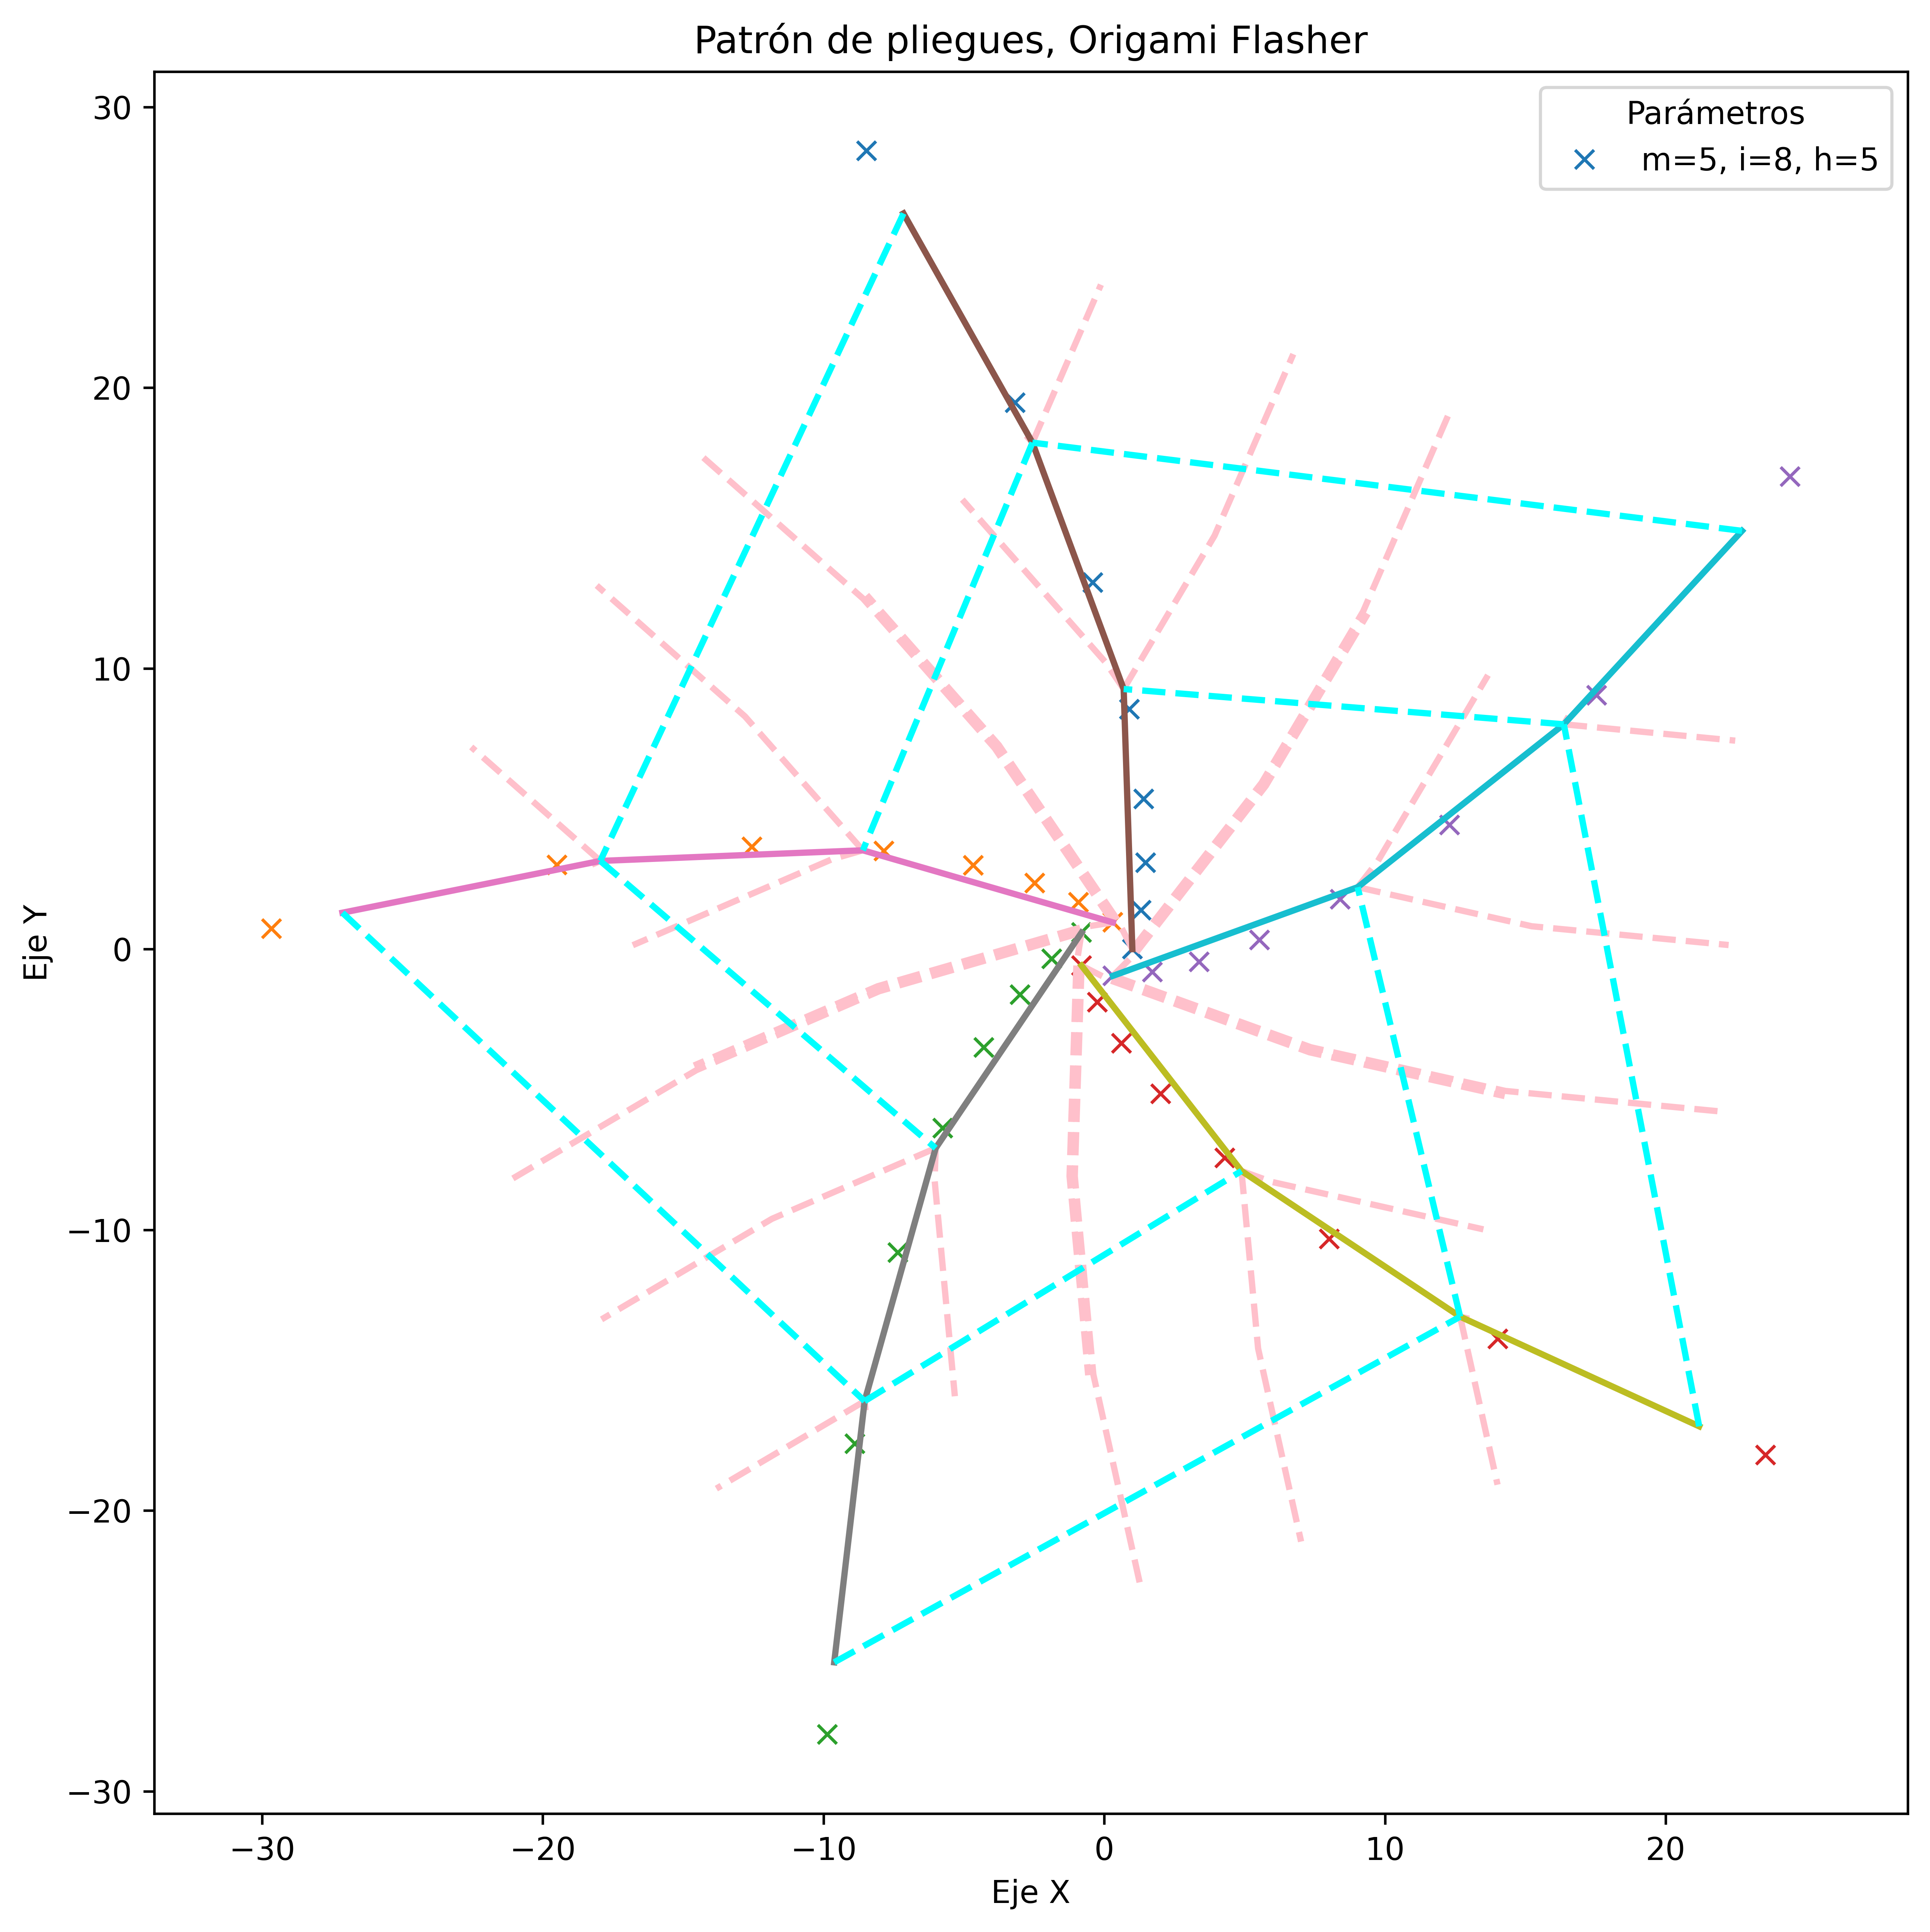

In [164]:
import matplotlib.pyplot as plt
import numpy as np

# Parámetros
j_values = range(m)
i_final = 8
altura = 5

# Asegúrate de tener bien definidas las funciones dk, lista_modulos, r_ijk y s_ijk
espacios = dk(altura, epsilon, m)
#print("espacios",espacios)
total_modulos = lista_modulos(j_values[0], i_final, m, delta, alpha, epsilon, espacios)[2]
#print("total_modulos",total_modulos)
i_totales = int(np.ceil(total_modulos / espacios)) -1 #la cantidad de r's que caben en una diagonal
#print("i totales",i_totales)

# Inicializar diccionarios para almacenar los puntos de cada i, j para diferentes k
puntos_r = {(i, j): [] for i in range(i_totales) for j in j_values}
puntos_s = {(i, j): [] for i in range(i_totales) for j in j_values}

plt.figure(figsize=(10, 10), dpi=600)

x_values_p = np.zeros((i_final, m))
y_values_p = np.zeros((i_final, m)) 

# Rellenar matrices con los puntos generados por p(i,j)
for i in range(i_final):
    for j in j_values:
        punto_p = p(i, j, m, delta, alpha, epsilon)  # Generar punto p(i,j)
        x_values_p[i, j] = punto_p[0]
        y_values_p[i, j] = punto_p[1]
        # Etiquetar los puntos
        #plt.text(x_values_p[i, j], y_values_p[i, j], f'p({i},{j})', fontsize=7, ha='right')

for j in j_values:
    plt.plot(x_values_p[:, j], y_values_p[:, j], 'x', label=f'j={j}',linewidth=6)


# Iterar sobre los valores de i y j para calcular los puntos
for j in j_values:
    for i in range(i_totales):
        for k in range(i_totales - i):
            # Obtener los puntos r_ijk y s_ijk
            punto_k = r_ijk(i, j, k, m, i_final, delta, alpha, epsilon, altura)
            punto_s = s_ijk(i, j, k, m, i_final, delta, alpha, epsilon, altura)
            
            # Guardar los puntos en las listas correspondientes a i y j
            puntos_r[(i, j)].append(punto_k)
            puntos_s[(i, j)].append(punto_s)
            # print("r", puntos_r)
            # print("s", puntos_s)
            
            # Graficar los puntos individuales con etiquetas
            #plt.text(punto_k[0], punto_k[1], f'r_{i},{j},{k}', fontsize=6)
            #plt.plot(punto_k[0], punto_k[1], 'ro')  # Puntos de r en rojo
            
            #plt.text(punto_s[0], punto_s[1], f's_{i},{j},{k}', fontsize=6)
            #plt.plot(punto_s[0], punto_s[1], 'bo')  # Puntos de s en azul

# Conectar los puntos para cada (i, j), variando k
for (i, j), puntos_r_ij in puntos_r.items():
    if len(puntos_r_ij) > 1:
        # Extraer las coordenadas para r
        x_values_r_ij = [punto[0] for punto in puntos_r_ij]
        y_values_r_ij = [punto[1] for punto in puntos_r_ij]
        # Graficar las líneas que conectan los puntos con el mismo i y j, pero diferentes k
        #plt.plot(x_values_r_ij, y_values_r_ij, linestyle='--', color='cyan', label=f'Linea r i={i}, j={j}')
        plt.plot(x_values_r_ij, y_values_r_ij, linestyle='--', color='pink', linewidth=2)
for (i, j), puntos_s_ij in puntos_s.items():
    if len(puntos_s_ij) > 1:
        # Extraer las coordenadas para s
        x_values_s_ij = [punto[0] for punto in puntos_s_ij]
        y_values_s_ij = [punto[1] for punto in puntos_s_ij]
        # Graficar las líneas que conectan los puntos con el mismo i y j, pero diferentes k
        #plt.plot(x_values_s_ij, y_values_s_ij, linestyle='--', color='pink', label=f'Linea s i={i}, j={j}')
        plt.plot(x_values_s_ij, y_values_s_ij, linestyle='--', color='pink', linewidth=2)
# Conectar puntos con el mismo j pero diferentes i para k=0
for j in j_values:
    puntos_k0_r = [puntos_r[(i, j)][0] for i in range(i_totales) if (i, j) in puntos_r]
    puntos_k0_s = [puntos_s[(i, j)][0] for i in range(i_totales) if (i, j) in puntos_s]
    
    if len(puntos_k0_r) > 1:
        # Extraer las coordenadas para r
        x_values_k0_r = [punto[0] for punto in puntos_k0_r]
        y_values_k0_r = [punto[1] for punto in puntos_k0_r]
        #plt.plot(x_values_k0_r, y_values_k0_r, linestyle='-', color='green', label=f'Linea r j={j} (k=0)')
        plt.plot(x_values_k0_r, y_values_k0_r, linestyle='-', linewidth=2)

j_values_4_phi=range(m+1)
for i in range(2,i_totales):
    for j in j_values_4_phi:
        if j+1<len(j_values_4_phi):
            punto_pp= r_i_j((i, j, m, i_final, delta, alpha, epsilon, altura))
            punto_pp_anterior=r_i_j((i-1, j+1, m, i_final, delta, alpha, epsilon, altura))    
            plt.plot([punto_pp[0],punto_pp_anterior[0]],[punto_pp[1],punto_pp_anterior[1]], linestyle='--', color='cyan', linewidth=2)

# Configuración final del gráfico
plt.title("Patrón de pliegues, Origami Flasher")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.axis('equal')
plt.legend(title="Parámetros", labels=[f"m={m}, i={i_final}, h={altura}"])
#plt.savefig("graficosintextm5.pdf", dpi=600)  # Guardar como PNG con alto DPI
plt.show()
